In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import seaborn as sns
import pyrealsense2 as rs
import copy
import pandas as pd
import glob
from realsense_detector import detect_contour

In [58]:
def cv2pil(image):
    ''' OpenCV型 -> PIL型 '''
    new_image = image.copy()
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = new_image[:, :, ::-1]
    elif new_image.shape[2] == 4:  # 透過
        new_image = new_image[:, :, [2, 1, 0, 3]]
    new_image = Image.fromarray(new_image)
    return new_image

In [59]:
depth_path = glob.glob('image_folder/*_depth.jpg')
depth_path

['image_folder/onigiriA_depth.jpg',
 'image_folder/panE_depth.jpg',
 'image_folder/panD_depth.jpg',
 'image_folder/onigiriC_depth.jpg',
 'image_folder/panC_depth.jpg',
 'image_folder/panA_depth.jpg',
 'image_folder/panB_depth.jpg',
 'image_folder/onigiriB_depth.jpg',
 'image_folder/boxB_depth.jpg',
 'image_folder/sandA_depth.jpg',
 'image_folder/boxA_depth.jpg',
 'image_folder/sandB_depth.jpg']

In [60]:
point = depth_path[0].find('depth')
re_path = depth_path[0][:point-1] + '.jpg'
re_path

'image_folder/onigiriA.jpg'

In [62]:
for i, path in enumerate(depth_path):
    point = path.find('depth')
    color_path = path[:point-1] + '.jpg'
    depth_image = cv2.imread(path, 0)
    color_image = cv2.imread(color_path)
    y1, y2, x1, x2 = detect_contour(depth_image)
    color_image = color_image[y1:y2, x1:x2]
    dot = color_path.find('.')
    re_path = color_path[:dot] + '_zoom.jpg'
    cv2.imwrite(re_path, color_image)

image_folder/onigiriA_depth.jpg image_folder/onigiriA.jpg
len contours: 13
image_folder/panE_depth.jpg image_folder/panE.jpg
len contours: 7
image_folder/panD_depth.jpg image_folder/panD.jpg
len contours: 48
image_folder/onigiriC_depth.jpg image_folder/onigiriC.jpg
len contours: 12
image_folder/panC_depth.jpg image_folder/panC.jpg
len contours: 12
image_folder/panA_depth.jpg image_folder/panA.jpg
len contours: 30
image_folder/panB_depth.jpg image_folder/panB.jpg
len contours: 32
image_folder/onigiriB_depth.jpg image_folder/onigiriB.jpg
len contours: 16
image_folder/boxB_depth.jpg image_folder/boxB.jpg
len contours: 5
image_folder/sandA_depth.jpg image_folder/sandA.jpg
len contours: 20
image_folder/boxA_depth.jpg image_folder/boxA.jpg
len contours: 2
image_folder/sandB_depth.jpg image_folder/sandB.jpg
len contours: 56


In [21]:
def return_fft_dict(paths):
    fft_dict = {}
    for index, path in enumerate(paths):
        sharp = path.find('/')
        dot = path.find('.')
        name = path[sharp+1:dot]
        
        img=cv2.imread(path,0)#0はグレースケールで読み込み

        #入力画像のサイズ取得
        width,height=img.shape

        #画像の二次元フーリエ変換
        fimg=np.fft.fft2(img)

        #パワースペクトル化する
        #fimg= 20*np.log(np.abs(fimg))

        #第1象限と第3象限，第2象限と第4象限の入れ替え
        fimg = np.fft.fftshift(fimg)#高周波透過フィルタの場合，ここはコメントアウト

        #入力画像と同じサイズの値0のnumpy array作成
        dst=np.zeros(img.shape, dtype=complex)

        #中心の値のみ透過(今回はローパス)
        a=0.2#aは中心からのフィルターサイズ比率
        dst[int(height*(0.5-a)):int(height*(0.5+a)), int(width*(0.5-a)):int(width*(0.5+a))] = fimg[int(height*(0.5-a)):int(height*(0.5+a)), int(width*(0.5-a)):int(width*(0.5+a))]

        #再び第1象限と第3象限，第2象限と第4象限の入れ替え
        dst= np.fft.fftshift(dst)#高周波透過フィルタの場合，ここはコメントアウト

        #二次元逆フーリエ変換
        dst = np.fft.ifft2(dst)

        #実数部のみ抽出
        low_img=np.uint8(dst.real)

        #画像の書き込み
        #cv2.imwrite("werry-icon-low.jpg",low_img)
        #plt.imshow(low_img)
        fft_dict[name] = low_img
        
    return fft_dict

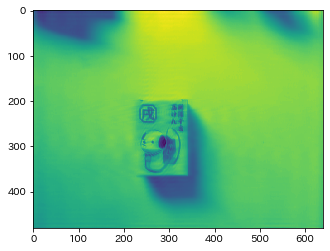

In [13]:
img=cv2.imread(img_path[0],0)#0はグレースケールで読み込み

#入力画像のサイズ取得
width,height=img.shape

#画像の二次元フーリエ変換
fimg=np.fft.fft2(img)

#パワースペクトル化する
#fimg= 20*np.log(np.abs(fimg))

#第1象限と第3象限，第2象限と第4象限の入れ替え
fimg = np.fft.fftshift(fimg)#高周波透過フィルタの場合，ここはコメントアウト

#入力画像と同じサイズの値0のnumpy array作成
dst=np.zeros(img.shape, dtype=complex)

#中心の値のみ透過(今回はローパス)
a=0.2#aは中心からのフィルターサイズ比率
dst[int(height*(0.5-a)):int(height*(0.5+a)), int(width*(0.5-a)):int(width*(0.5+a))] = fimg[int(height*(0.5-a)):int(height*(0.5+a)), int(width*(0.5-a)):int(width*(0.5+a))]

#再び第1象限と第3象限，第2象限と第4象限の入れ替え
dst= np.fft.fftshift(dst)#高周波透過フィルタの場合，ここはコメントアウト

#二次元逆フーリエ変換
dst = np.fft.ifft2(dst)

#実数部のみ抽出
low_img=np.uint8(dst.real)

#画像の書き込み
#cv2.imwrite("werry-icon-low.jpg",low_img)
plt.imshow(low_img)

In [63]:
img_path = glob.glob('image_folder/*zoom.jpg')

In [65]:
fft_dict = return_fft_dict(img_path)

In [66]:
keys = [name for name in fft_dict.keys()]

In [67]:
onerow_list = []
for depth in fft_dict.values():
    onerow = []
    for row in depth:
        for data in row:
            onerow.append(data)
    onerow_list.append(onerow)

In [70]:
for i, key in enumerate(keys):
    print(i, key)

0 onigiriA_zoom
1 boxB_zoom
2 panC_zoom
3 onigiriB_zoom
4 sandB_zoom
5 panA_zoom
6 panE_zoom
7 sandA_zoom
8 panB_zoom
9 onigiriC_zoom
10 panD_zoom
11 boxA_zoom


<h3>全種類<h3>

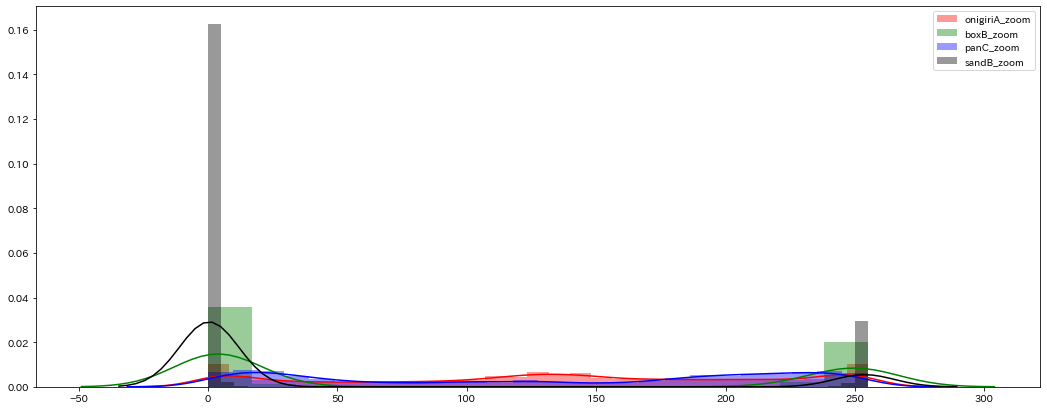

In [73]:
plt.figure(figsize=(18, 7))
sns.distplot(onerow_list[0], color='r', label=keys[0])
sns.distplot(onerow_list[1], color='g', label=keys[1])
sns.distplot(onerow_list[2], color='b', label=keys[2])
sns.distplot(onerow_list[4], color='black', label=keys[4])
plt.legend()

<h3>全種類（サンドウィッチなし）<h3>

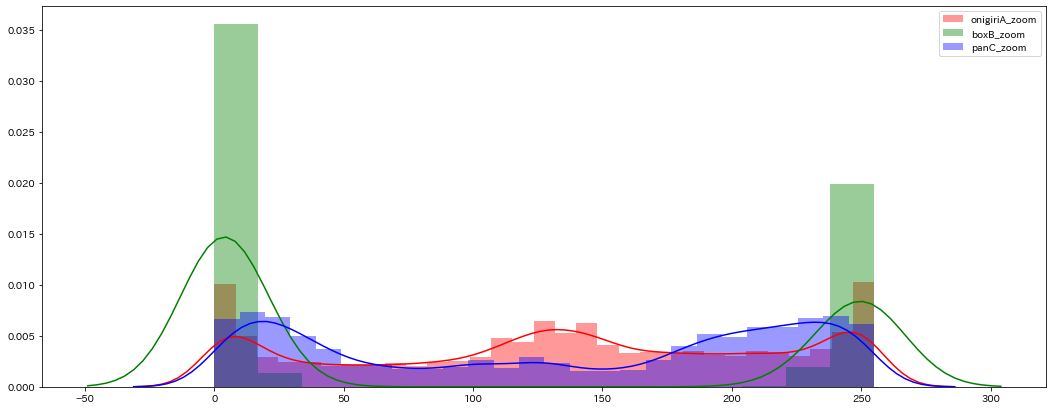

In [74]:
plt.figure(figsize=(18, 7))
sns.distplot(onerow_list[0], color='r', label=keys[0])
sns.distplot(onerow_list[1], color='g', label=keys[1])
sns.distplot(onerow_list[2], color='b', label=keys[2])
plt.legend()

<h3>おにぎり<h3>

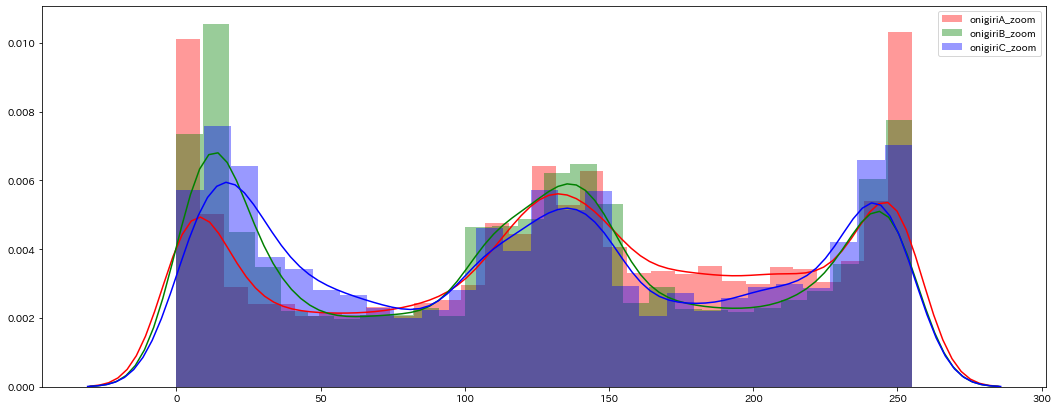

In [72]:
plt.figure(figsize=(18, 7))
sns.distplot(onerow_list[0], color='r', label=keys[0])
sns.distplot(onerow_list[3], color='g', label=keys[3])
sns.distplot(onerow_list[9], color='b', label=keys[9])
# sns.distplot(onerow_list[4], color='black', label=keys[4])
plt.legend()

<h3>箱型<h3>

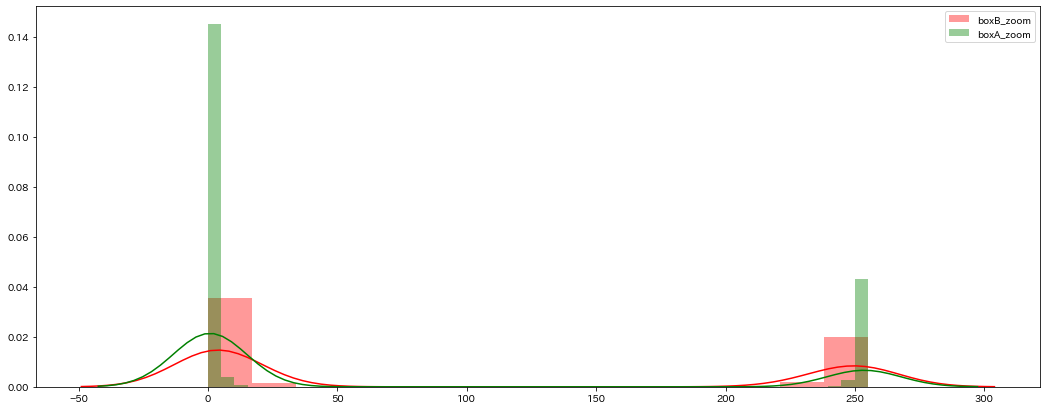

In [75]:
plt.figure(figsize=(18, 7))
sns.distplot(onerow_list[1], color='r', label=keys[1])
sns.distplot(onerow_list[11], color='g', label=keys[11])
plt.legend()

<h3>パン<h3>

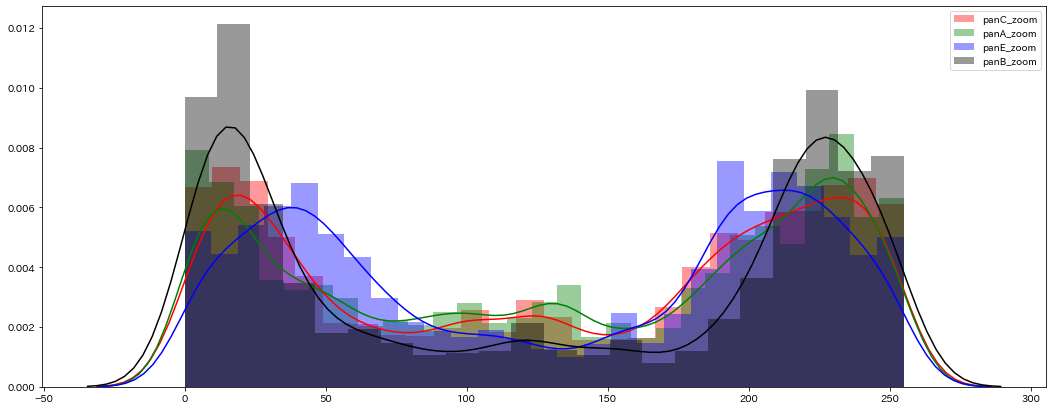

In [76]:
plt.figure(figsize=(18, 7))
sns.distplot(onerow_list[2], color='r', label=keys[2])
sns.distplot(onerow_list[5], color='g', label=keys[5])
sns.distplot(onerow_list[6], color='b', label=keys[6])
sns.distplot(onerow_list[8], color='black', label=keys[8])
plt.legend()

In [120]:
d1={'dog': onerow_list[0], 'realsense': onerow_list[1], 'iris': onerow_list[2], 'allegra': onerow_list[3]}
columns = ['dog', 'realsense', 'iris', 'allegra']
name_list = []
data_list = []
for i, onerow in enumerate(onerow_list):
    for data in onerow:
        name_list.append(columns[i])
        data_list.append(data)

In [121]:
df = pd.DataFrame()
df['data'] = data_list
df['name'] = name_list

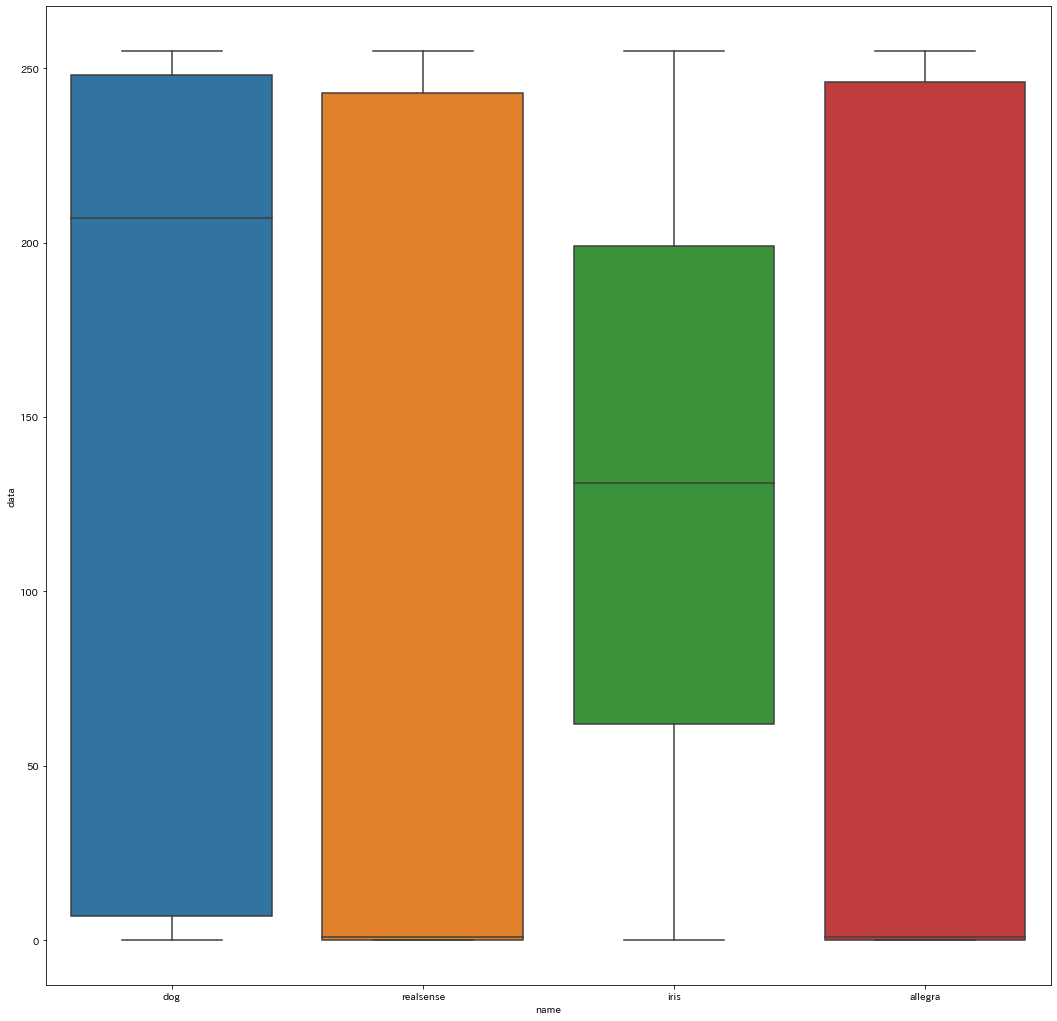

In [122]:
plt.figure(figsize=(18, 18))
sns.boxplot(x='name', y='data', data=df)